In [1]:
import numpy as np
import matplotlib.pyplot as plt

def brown1(Nt,M,dt=1):
    """Run M Brownian motion simulations each consisting of Nt time steps
    with time step = dt
    Returns: X: the M trajectories; Xm: the mean across these M samples; Xv:
    the variance across these M samples
    """
    from numpy.random import randn

    X = np.zeros((Nt+1,M))

    for i in range(M):
        for j in range(Nt):
            X[j+1,i] = X[j,i] + np.sqrt(dt)*randn(1)

    Xm = np.mean(X,axis=1)
    Xv = np.var(X,axis=1)
    return X,Xm,Xv

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [13]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

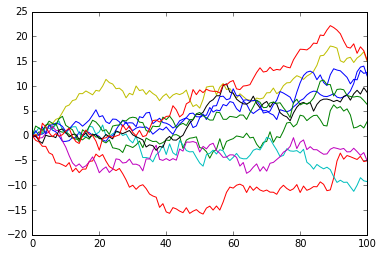

In [47]:
(X, Xm, Xv) = brown1(100,20)
t= np.arange(0,101)

for a in range(0,10):
    plt.plot(t, X[:,a])
plt.show()

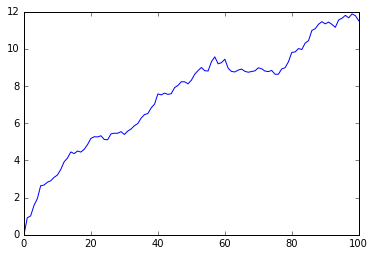

In [50]:
var = np.sqrt(Xv)

plt.plot(t, var)
plt.show()

In [52]:
#repeating with M=200


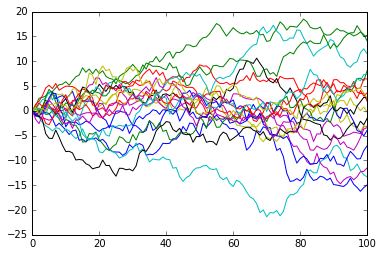

In [53]:
(X, Xm, Xv) = brown1(100,200)
t= np.arange(0,101)

for a in range(0,20):
    plt.plot(t, X[:,a])
plt.show()

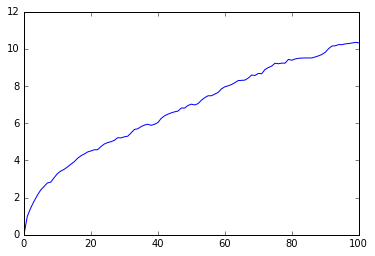

In [54]:
var = np.sqrt(Xv)

plt.plot(t, var)
plt.show()

In [79]:
x = 2
P = np.zeros((3,x))
P 


array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [94]:
def brown2(Nt,M,dt=1):
    """Run M Brownian motion simulations each consisting of Nt time steps
    with time step = dt
    Returns: X: the M trajectories; Xm: the mean across these M samples; Xv:
    the variance across these M samples
    """
    from numpy.random import randn

    X = np.zeros((Nt+1,M))
    Xm = np.zeros((Nt+1,M))
    Xv = np.zeros((Nt+1, M))

    for i in range(M):
        for j in range(Nt):
            X[j+1,i] = X[j,i] + np.sqrt(dt)*randn(1)
            Xm[j+1, i] = np.mean(X[j+1, 0:i+1])
            Xv[j+1, i] = np.var(X[j+1, 0:i+1])
            
    return X,Xm,Xv

In [95]:
brown2(5,2)

(array([[ 0.        ,  0.        ],
        [ 0.1782136 ,  0.53562052],
        [ 0.24581475, -0.81674211],
        [ 0.7454425 , -1.65355825],
        [ 1.84188354, -1.34301425],
        [ 0.43822523, -0.75338254]]), array([[ 0.        ,  0.        ],
        [ 0.1782136 ,  0.35691706],
        [ 0.24581475, -0.28546368],
        [ 0.7454425 , -0.45405787],
        [ 1.84188354,  0.24943464],
        [ 0.43822523, -0.15757865]]), array([[ 0.        ,  0.        ],
        [ 0.        ,  0.03193493],
        [ 0.        ,  0.28225677],
        [ 0.        ,  1.43880115],
        [ 0.        ,  2.53589348],
        [ 0.        ,  0.35498227]]))

In [166]:
def analyze(Mvalues, mvalvsvar=False, display=False):
    length = len(Mvalues)
    ER = np.zeros((3,length))
    ER[0,:] = Mvalues
    
    maX = max(Mvalues)
    (X, Xm, Xv) = brown2(100,maX)
    
    
    for a in range(0,length):
        M = Mvalues[a]
        ER[1, a] = Xv[100, M-1]
        ER[2,a] = abs(100- Xv[100, M-1])
    
    if mvalvsvar is True:
        plt.plot(ER[0,:], ER[1,:])
        plt.show()
    
    if display is True:
        plt.plot(np.log(ER[0,:]),np.log(ER[2,:]))
        plt.show()
        
    return ER
        
    

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


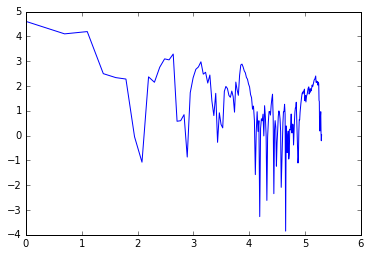

array([[  0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   5.00000000e+00,
          6.00000000e+00,   7.00000000e+00,   8.00000000e+00,
          9.00000000e+00,   1.00000000e+01,   1.10000000e+01,
          1.20000000e+01,   1.30000000e+01,   1.40000000e+01,
          1.50000000e+01,   1.60000000e+01,   1.70000000e+01,
          1.80000000e+01,   1.90000000e+01,   2.00000000e+01,
          2.10000000e+01,   2.20000000e+01,   2.30000000e+01,
          2.40000000e+01,   2.50000000e+01,   2.60000000e+01,
          2.70000000e+01,   2.80000000e+01,   2.90000000e+01,
          3.00000000e+01,   3.10000000e+01,   3.20000000e+01,
          3.30000000e+01,   3.40000000e+01,   3.50000000e+01,
          3.60000000e+01,   3.70000000e+01,   3.80000000e+01,
          3.90000000e+01,   4.00000000e+01,   4.10000000e+01,
          4.20000000e+01,   4.30000000e+01,   4.40000000e+01,
          4.50000000e+01,   4.60000000e+01,   4.70000000e+01,
        

In [168]:
analyze(range(0,201), display=True)
